In [1]:
"""
Create and visualize the network of foods and nutrients
"""
import networkx as nx
import matplotlib.pyplot as plt
import csv

In [2]:
with open("./code/nutrients.csv") as infile:
    csv_reader = csv.reader(infile)
    G = nx.Graph(csv_reader)
print(G.nodes())

['A', 'carrots', 'eggs', 'fatty fish', 'green leafy vegs', 'liver', 'milk', 'tomatoes', 'B12', 'B6', 'asparagus', 'beans', 'kidneys', 'potatoes', 'C', 'pumpkins', 'Ca', 'broccoli', 'cheese', 'Cu', 'nuts', 'whole grains', 'D', 'mushrooms', 'E', 'seeds', 'Mn', 'legumes', 'wheat', 'Se', 'Zn', 'beef', 'riboflavin', 'niacin', 'folates', 'spinach', 'poultry', 'shellfish', 'thiamin', 'veg oils', 'yogurt']


In [13]:
loops = list(nx.selfloop_edges(G))
print(loops)

[('tomatoes', 'tomatoes')]


In [14]:
G.remove_edges_from(loops) # remove edges
loops = list(nx.selfloop_edges(G))
loops

[]

# relable the nodes

In [15]:
mapping = {node: node.title() for node in G if isinstance(node, str)}
nx.relabel_nodes(G, mapping, copy=False)
print(G.nodes())

['A', 'B12', 'B6', 'C', 'Ca', 'Cu', 'D', 'E', 'Mn', 'Se', 'Zn', 'Yogurt', 'Veg Oils', 'Thiamin', 'Shellfish', 'Poultry', 'Spinach', 'Folates', 'Niacin', 'Riboflavin', 'Beef', 'Wheat', 'Legumes', 'Seeds', 'Mushrooms', 'Whole Grains', 'Nuts', 'Cheese', 'Broccoli', 'Pumpkins', 'Potatoes', 'Kidneys', 'Beans', 'Asparagus', 'Tomatoes', 'Milk', 'Liver', 'Green Leafy Vegs', 'Fatty Fish', 'Eggs', 'Carrots']


Selecting specific node and looking at it

In [16]:
print(G["Zn"])

{'Poultry': {}, 'Beef': {}, 'Nuts': {}, 'Potatoes': {}, 'Kidneys': {}, 'Beans': {}, 'Liver': {}}


In [9]:
nutrients = set(("B12", "Zn", "D", "B6", "A", "Se", "Cu", "Folates",
                 "Ca", "Mn", "Thiamin", "Riboflavin", "C", "E", "Niacin"))
nutrient_dict = {node: (node in nutrients) for node in G}
nx.set_node_attributes(G, nutrient_dict, "nutrient")

In [7]:
import dzcnapy_plotlib as dzcnapy

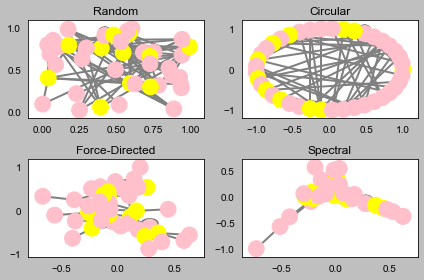

In [12]:
# Prepare for drawing
colors = ["yellow" if n[1]["nutrient"] else "pink" for n in
          G.nodes(data=True)]
dzcnapy.medium_attrs["node_color"] = colors

# Draw four layouts in four subplots
_, plot = plt.subplots(2, 2)

subplots = plot.reshape(1, 4)[0]
layouts = (nx.random_layout, nx.circular_layout, nx.spring_layout,
           nx.spectral_layout)
titles = ("Random", "Circular", "Force-Directed", "Spectral")
for plot, layout, title in zip(subplots, layouts, titles):
    pos = layout(G)
    nx.draw_networkx(G, pos=pos, ax=plot, with_labels=False, 
                     **dzcnapy.medium_attrs)
    plot.set_title(title)
    dzcnapy.set_extent(pos, plot)

dzcnapy.plot("nutrients")

In [17]:
! pip install pygraphviz

  Using cached pygraphviz-1.9.zip (119 kB)
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for pygraphviz, since package 'wheel' is not installed.
  Running setup.py install for pygraphviz ... error
  error: subprocess-exited-with-error
  
  × Running setup.py install for pygraphviz did not run successfully.
  │ exit code: 1
  ╰─> [55 lines of output]
      running install
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-x86_64-3.9
      creating build/lib.macosx-10.9-x86_64-3.9/pygraphviz
      copying pygraphviz/scraper.py -> build/lib.macosx-10.9-x86_64-3.9/pygraphviz
      copying pygraphviz/graphviz.py -> build/lib.macosx-10.9-x86_64-3.9/pygraphviz
      copying pygraphviz/__init__.py -> build/lib.macosx-10.9-x86_64-3.9/pygraphviz
      copying pygraphviz/agraph.py -> build/lib.macosx-10.9-x86_64-3.9/pygraphviz
      copying pygraphviz/testing.py -> build/lib.macosx-10.9-x86_64-3.9/pygraphviz
      creati

ImportError: requires pygraphviz http://pygraphviz.github.io/

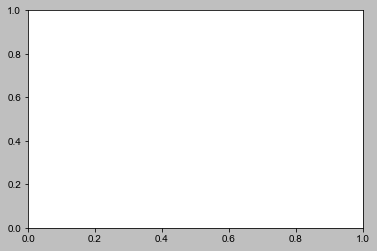

In [13]:
from networkx.drawing.nx_agraph import graphviz_layout

_, plot = plt.subplots()
pos = graphviz_layout(G)
nx.draw_networkx(G, pos, **dzcnapy.attrs)
dzcnapy.set_extent(pos, plot)
dzcnapy.plot("nutrients-graphviz")